In [1]:
import pandas as pd 
import sklearn as sk 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import yellowbrick
import mlxtend

pd.set_option('display.max_columns', 500)
plt.rcParams.update({'font.size': 18})

In [2]:
df = pd.read_csv('/home/sauraj/Desktop/Notebooks/Research/newspy.csv')

# Market Trend

* 0 = Bearish 
* 1 = Bullish 
* 2 = Reversal 

In [6]:
df.head(100)

,High,Low,Open,Close,Volume,Adj Close,5-DayEMA,20-DayEMA,Real Lower Band,Real Middle Band,Real Upper Band,MACD,MACD_Hist,MACD_Signal,SlowD,SlowK,CCI,OBV,EMA_Reversal,Returns,MarketTrend,EMA_Trend_Down,EMA_Trend_Reversal,EMA_Trend_Up,StoReversal_NoReversal,StoReversal_Reversal,MACDTrend_Down,MACDTrend_Reversal,MACDTrend_Up,OBVTrend_Down,OBVTrend_Up,CCITrend_NoReversal,CCITrend_Reversal
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1998-02-23,104.250000,103.343697,104.250000,104.062500,3227800,71.191544,103.899979,103.869506,96.2644,100.8570,105.4496,2.0341,0.1147,1.9194,87.2955,88.3007,114.5056,39995300,0.030473,-0.003904,2,0,1,0,1,0,0,0,1,0,1,0,1
1998-02-24,104.093697,102.937500,103.906197,103.250000,3386800,70.635689,103.592094,103.642027,97.1356,101.2258,105.3159,1.9688,0.0395,1.9293,85.9809,78.9543,93.2333,36608500,-0.049933,0.007869,2,0,1,0,1,0,0,1,0,1,0,1,0
1998-02-25,104.875000,103.625000,103.750000,104.531197,3481800,71.512207,103.982183,103.898717,97.8045,101.6101,105.4158,1.9974,0.0545,1.9429,80.9184,75.5002,124.9737,40090300,0.083466,-0.012257,2,0,1,0,1,0,0,1,0,0,1,0,1
1998-02-26,105.218697,104.187500,104.437500,105.125000,3187600,71.918427,104.420895,104.195344,98.3230,101.9805,105.6379,2.0444,0.0812,1.9632,77.2805,77.3869,140.6155,43277900,0.225551,-0.005649,2,0,0,1,1,0,0,1,0,0,1,0,1
1998-02-27,105.531197,104.531197,104.968697,105.125000,3442900,71.918427,104.678184,104.391459,98.8459,102.3242,105.8025,2.0580,0.0758,1.9822,80.6615,89.0974,140.6006,43277900,0.286725,0.000000,2,0,0,1,1,0,0,1,0,0,1,0,1
1998-03-02,105.750000,104.625000,105.250000,104.906197,4252300,71.768776,104.758913,104.488783,99.5269,102.6539,105.7809,2.0277,0.0364,1.9913,83.3883,83.6808,130.1262,39025600,0.270130,0.002086,2,0,0,1,1,0,0,1,0,1,0,0,1
1998-03-03,105.625000,104.531197,104.531197,105.500000,3349200,72.174965,105.015972,104.663577,99.8315,102.9320,106.0325,2.0282,0.0295,1.9987,84.5452,80.8575,122.7682,42374800,0.352395,-0.005628,2,0,0,1,1,0,0,1,0,0,1,0,1
1998-03-04,105.406197,104.437500,105.093697,104.812500,4404100,71.704651,104.946337,104.687465,100.1146,103.1383,106.1620,1.9507,-0.0384,1.9891,76.8720,66.0778,97.0422,37970700,0.258872,0.006559,2,0,0,1,1,0,0,1,0,1,0,1,0
1998-03-05,104.437500,103.156197,103.500000,103.843697,7268000,71.041862,104.572304,104.560401,100.5081,103.3023,106.0965,1.7904,-0.1589,1.9493,66.1719,51.5803,34.4516,30702700,0.011903,0.009329,2,0,1,0,1,0,1,0,0,1,0,1,0


## Data Visualization

In [4]:
df['OBVTrend_Down'].value_counts()

0    2822
1    2423
Name: OBVTrend_Down, dtype: int64

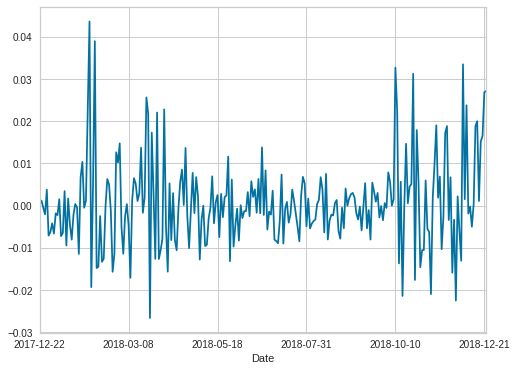

In [190]:
plt.figure(figsize=(8,6))
df['Returns'][4993:5245].plot()
plt.savefig('1yreturns.png', dpi=200, figsize=(8,6))

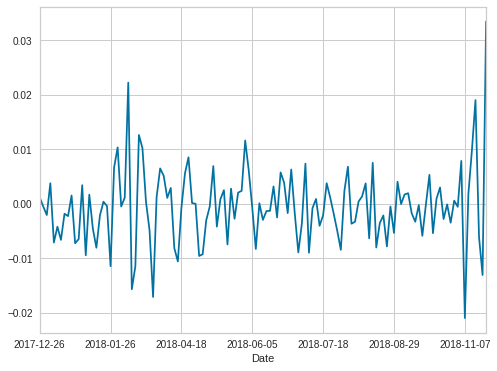

In [28]:
#df_returns = df[4993:5245]
plt.figure(figsize=(8,6))
df_returns[df_returns['MarketTrend'] == 1]['Returns'].plot()
plt.savefig('1yreturnsbull.png', dpi=200, figsize=(8,6))

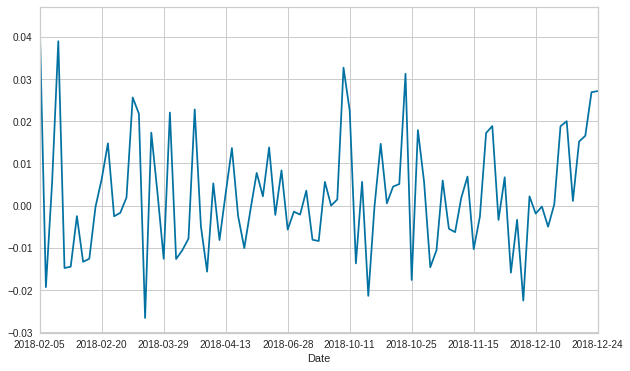

In [33]:
plt.figure(figsize=(10,6))
df_returns[df_returns['MarketTrend'] == 0]['Returns'].plot()
plt.savefig('1yreturnsbear.png', dpi=200, figsize=(12,6))

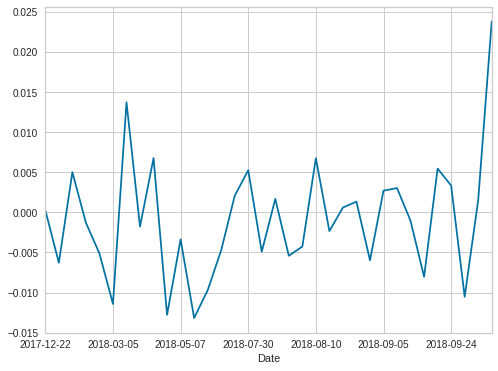

In [32]:
plt.figure(figsize=(8,6))
df_returns[df_returns['MarketTrend'] == 2]['Returns'].plot()
plt.savefig('1yreturnsreverse.png', dpi=200, figsize=(8,6))

In [5]:
df = df.set_index('Date')

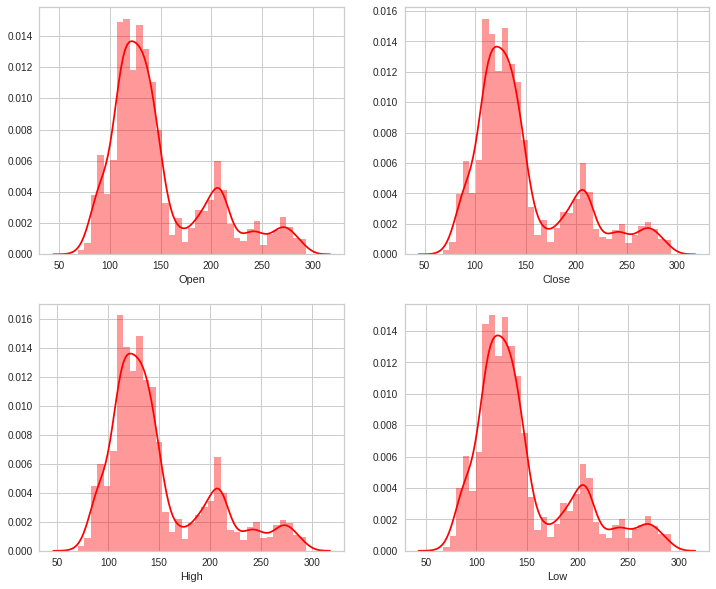

In [5]:
fig = plt.figure(figsize=(12, 10))
ax1 = plt.subplot2grid((2,2), (0, 0))
sns.distplot(df['Open'], color='red')

ax2 = plt.subplot2grid((2, 2),(0,1))
sns.distplot(df['Close'],color='red')

ax3 = plt.subplot2grid((2, 2), (1,0))
sns.distplot(df['High'], color='red')

ax3 = plt.subplot2grid((2, 2), (1,1))
sns.distplot(df['Low'], color='red')

#plt.savefig("kde.png",dpi=200)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Lag plot of Volume')

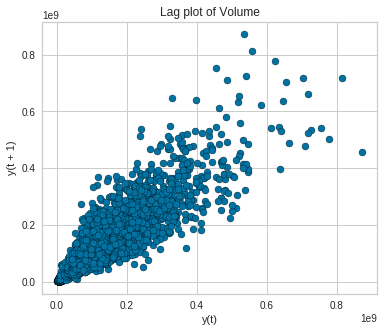

In [6]:
from pandas.plotting import lag_plot, autocorrelation_plot

plt.figure(figsize=(6, 5))
lag_plot(df['Volume'], edgecolor='black')
plt.title('Lag plot of Volume')
#plt.savefig('lag.png', dpi=400)

In [22]:
#Autocorrelation testing for volume traded 
from statsmodels.stats.stattools import durbin_watson
x = durbin_watson(df['Volume'][4993:5245])
print(x)

0.1255481177496889


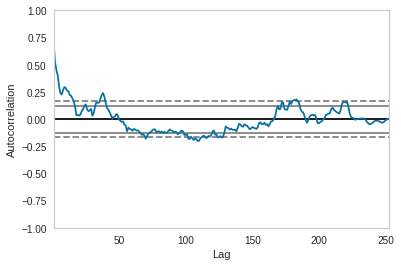

In [69]:
autocorrelation_plot(df['Volume'][4993:5245])
#plt.title('Autocorrelation [252 days]')
#plt.savefig('autocorrel252.png', dpi=400)

In [47]:
df_markets[df_markets['MarketTrend'] == 2]['Close'].median()

275.72999572755

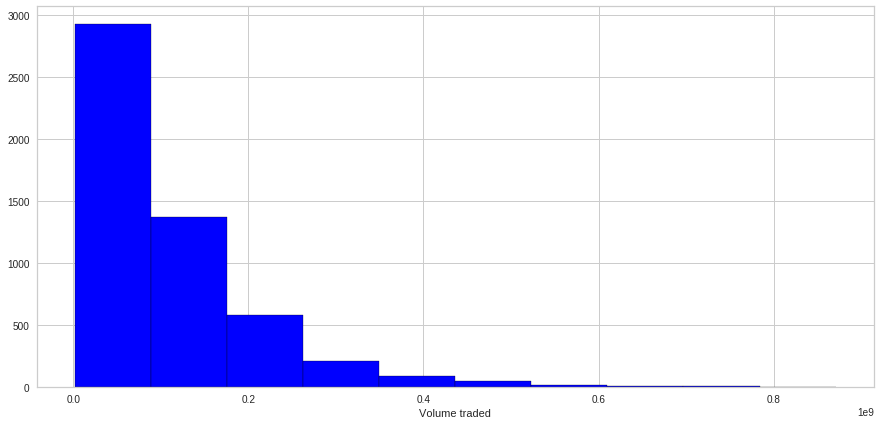

In [107]:
fig = plt.figure(figsize=(15, 7))
plt.hist(df['Volume'], edgecolor='black', color='blue')
plt.xlabel('Volume traded')
plt.savefig('volumes.png', dpi=400)

In [ ]:
plt.plot(df['Returns'])

In [57]:
len(df.iloc[5182:5245])

63

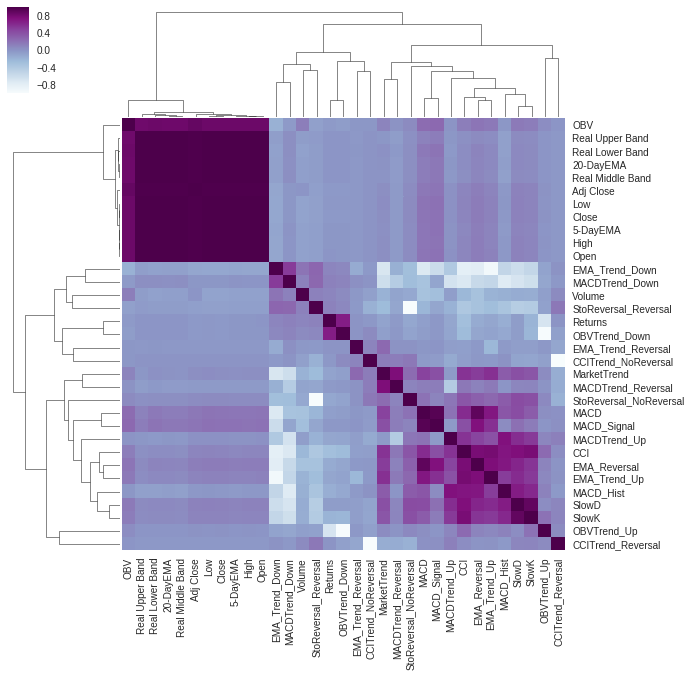

In [59]:

sns.clustermap(df.corr(), square=False, cmap="BuPu")
plt.savefig('correlation.png', dpi=400, bbox_inches='tight')

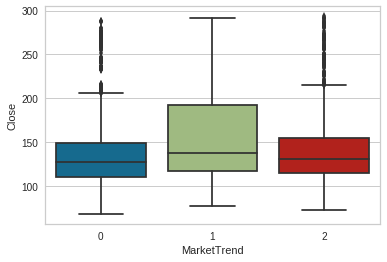

In [11]:
sns.boxplot(x="MarketTrend",y="Close", data=df)

In [165]:
final_df = pd.concat([pca_df, y_train], axis=1)

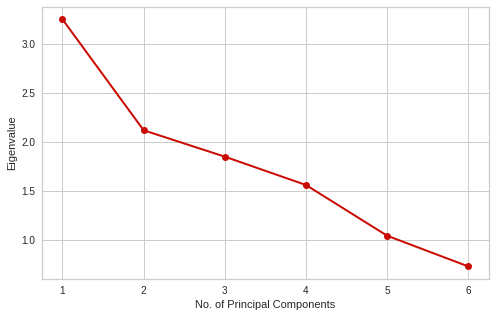

In [136]:
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(6) + 1
plt.plot(sing_vals, pca.explained_variance_, 'ro-', linewidth=2)
plt.xlabel('No. of Principal Components')
plt.ylabel('Eigenvalue')
plt.savefig('scree.png', dpi=400)

In [169]:
colorz = sns.color_palette("Blues_d")

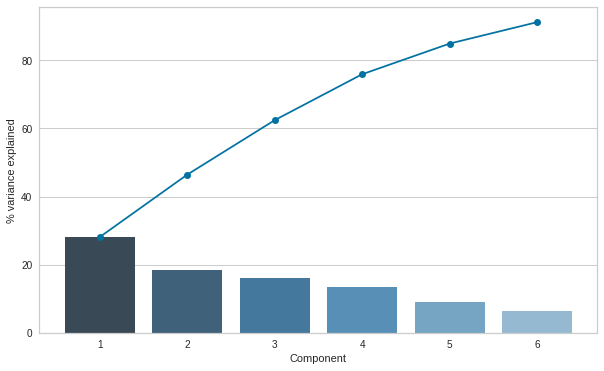

In [188]:
pca.explained_variance_ * 100
components = np.array([1, 2, 3, 4, 5, 6])
plt.figure(figsize=(10,6))
sns.barplot(x=components, y=pca.explained_variance_ratio_*100, palette="Blues_d")
plt.plot((pca.explained_variance_ratio_*100).cumsum(), 'bo-')
plt.xlabel('Component')
plt.ylabel('% variance explained')
plt.savefig('varianceexplained.png',dpi=300)

# Data Splitting and Dimension Reduction

In [38]:
train = df[0:4196]
test = df[4196:]

In [39]:
X = df.drop(['MarketTrend'],axis=1)
y = df['MarketTrend']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, random_state=44, test_size=0.2)

In [41]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(-1, 1))
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)

/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X_train_scaled, y_train)
pca_Xtrain = pca.transform(X_train_scaled)
pca_Xtest = pca.transform(X_test_scaled)

In [118]:
pca.explained_variance_

array([3.25142942, 2.11789574, 1.8482902 , 1.55881065, 1.04052218,
       0.72657168])

In [119]:
np.sum(pca.explained_variance_ratio_*100)

91.17528482757297

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

knn = KNeighborsClassifier(n_neighbors=21)
rfc = RandomForestClassifier()
svc = SVC(gamma='auto', kernel='rbf')
svr_cv = cross_val_score(knn, pca_Xtrain, y_train, cv=10, scoring='accuracy')

In [129]:
svr_cv

array([0.98815166, 0.96199525, 0.99761905, 0.98568019, 0.98806683,
       0.99045346, 0.98568019, 0.99522673, 0.97374702, 0.97136038])

In [133]:
rfc.fit(pca_Xtrain, y_train)
predictions = rfc.predict(pca_Xtest)

/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.778836987607245

In [29]:
y_test[1:5]

Date
2014-10-27    196.160004
2014-10-28    198.410004
2014-10-29    198.110001
2014-10-30    199.380005
Name: Close, dtype: float64

/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


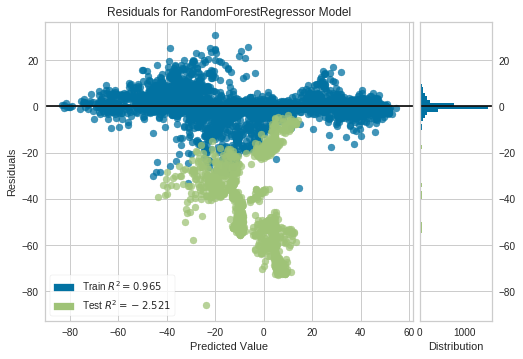

In [99]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(rfr)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

In [31]:
predictions[1:5]

array([186.10121785, 187.50032649, 186.69202544, 188.3560955 ])

In [148]:
ggg = np.reshape(X_train_scaled, (1, 4196, 32))

In [150]:
ggg.shape

(1, 4196, 32)

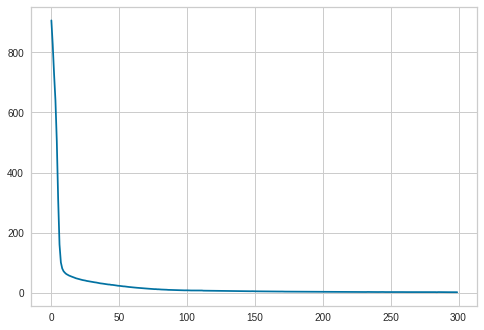

In [111]:
plt.plot(history.history['loss'])